# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

In [1]:
import requests
import seaborn as sns
import pandas as pd
import time
from bs4 import BeautifulSoup
pastsets = {'Name':[], 
           'Age': [],
            'Home town':[],
           'Occupation': [],
           'Outcome': [],
           'Season': []}

pain=[]
doublepain=[]
for i in range(1, 28):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable sortable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    place = cells[5].text.strip() if len(cells) > 5 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
# Don't forget to call info()!

no table
no table
no table
no table
no table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        613 non-null    object
 1   Age         613 non-null    object
 2   Home town   613 non-null    object
 3   Occupation  613 non-null    object
 4   Outcome     613 non-null    object
 5   Season      613 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 28.9+ KB
pains: []


,Name,Age,Home town,Occupation,Outcome,Season
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1


In [2]:
for i in range(1, 9):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Australian_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+40)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        816 non-null    object
 1   Age         816 non-null    object
 2   Home town   816 non-null    object
 3   Occupation  816 non-null    object
 4   Outcome     816 non-null    object
 5   Season      816 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 38.4+ KB
pains: []

                    Name Age                 Home town  \
811        Georgie Glass  32          Hobart, Tasmania   
812      Leilani Vakaahi  27  Forster, New South Wales   
813  Marlaina McPhillips  31       Melbourne, Victoria   
814         Nadine Kodsi  30       Melbourne, Victoria   
815          Paige Royal  31       Melbourne, Victoria   

                  Occupation    Outcome  Season  
811          Project Manager  Episode 3      48  
812     Partnerships Manager        N/A      48  
813  Fundraisin

In [3]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_Canada_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+50)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        864 non-null    object
 1   Age         864 non-null    object
 2   Home town   864 non-null    object
 3   Occupation  864 non-null    object
 4   Outcome     864 non-null    object
 5   Season      864 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 40.6+ KB
pains: []

              Name Age                                   Home town  \
859  Kelsey Palmer  28                            Calgary, Alberta   
860  Raelee Fedyna  26                            Calgary, Alberta   
861  Ritiuska Leon  33  Puerto Ordaz, Venezuela / Calgary, Alberta   
862   Sarah Barber  31                     St. Catharines, Ontario   
863  Sharan Garcha  23                 Vancouver, British Columbia   

                  Occupation    Outcome  Season  
859                Sommelier  Episode 1    

In [4]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Greek_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+60)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        911 non-null    object
 1   Age         911 non-null    object
 2   Home town   911 non-null    object
 3   Occupation  911 non-null    object
 4   Outcome     911 non-null    object
 5   Season      911 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 42.8+ KB
pains: []

                  Name Age Home town                            Occupation  \
906  Irene Katsigianni  19    Athens  Primary and Community Health Student   
907    Valeria Merakou  28    Athens                                Author   
908             Laoura  19    Rhodes                             Bartender   
909        Dora Kinali  22    Serres                                Dancer   
910   Lena Nikolarakou  22   Trikala                              Aclogist   

    Outcome  Season  
906  Week 1      62  
9

In [5]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_New_Zealand_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+70)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        955 non-null    object
 1   Age         955 non-null    object
 2   Home town   955 non-null    object
 3   Occupation  955 non-null    object
 4   Outcome     955 non-null    object
 5   Season      955 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.9+ KB
pains: []

                                 Name Age     Home town  \
950  Metotisi "Metz" Komiti-Faalavaau  28      Auckland   
951                     Catherine Lum  26      Auckland   
952                        Emily Rose  33      Auckland   
953                       Freya Jones  26  Christchurch   
954                      Harmony Moki  27      Auckland   

                     Occupation         Outcome  Season  
950               Administrator  Quit Episode 3      72  
951  Ambulance customer service       Episo

In [6]:

for i in range(1):
    url="https://en.wikipedia.org/wiki/The_Bachelor_(Brazilian_TV_series)"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+80)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        980 non-null    object
 1   Age         980 non-null    object
 2   Home town   980 non-null    object
 3   Occupation  980 non-null    object
 4   Outcome     980 non-null    object
 5   Season      980 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 46.1+ KB
pains: []

                Name Age              Home town                Occupation  \
975    Letícia Mello  20  São Bernardo do Campo  Public relations student   
976  Michelle Mignon  26                Uberaba                     Model   
977     Nanny Correa  30           Bom Despacho                        DJ   
978    Suzy Pianista  33              São Paulo                   Pianist   
979  Viviane Pereira  27         Jaraguá do Sul         Real estate agent   

    Outcome  Season  
975     N/A      80  
976    

In [7]:

for i in range(5,6):
    url=f"https://en.wikipedia.org/wiki/The_Bachelor_(British_TV_series)_series_{i}"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+90)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.2+ KB
pains: []

               Name Age      Home town              Occupation    Outcome  \
999     Rachel Boon  24         Surrey             Childminder  Episode 1   
1000   Rebecca Rock  25  Hertfordshire          Hair Colourist  Episode 1   
1001    Sophia Port  25         London              Finance PA  Episode 1   
1002  Sarah Stewart  21     Nottingham                 Student  Episode 1   
1003  Victoria Ebel  23      Guildford  Health Care Technician  Episode 1   

      Season  
999       95  
1000      95  
1001

### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

In [8]:
print(df['Outcome'].unique())


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


In [9]:
print(df['Occupation'].unique())
occupationnumber= {'occupation':[], 'number':[]}
for i, occupation in enumerate(df['Occupation'].unique()):
    occupationnumber['occupation'].append(occupation)
    occupationnumber['number'].append(i)
occupationnumber=pd.DataFrame(occupationnumber)
occupationnumber.head()

['Event Planner' 'Miami Heat Dancer' 'Financial Management Consultant'
 'Nanny' 'Graduate Student' 'Attorney' 'Actress'
 'Commercial Real Estate Agent' 'Special Ed. Teacher'
 'Production Coordinator' 'Hooters Waitress' 'Power Tool Sales Rep.'
 'Photographer' 'Business Development Director' 'Neuropsychologist'
 'Doctor' 'Bar Manager' 'Retail Manager' 'Advertising Executive'
 'Insurance Representative' '6th Grade Teacher' 'Technology Specialist'
 'School Psychologist' 'College Student' 'Executive Recruiter'
 'Registered Nurse' 'Flight Attendant' 'Assistant Financial Advisor'
 'Marriage Therapy Trainee' 'Airline Supervisor' 'Graphic Artist'
 'Radio Sales' 'Publications Quality Control' 'Strategic Planning Analyst'
 'Psychologist' '3rd Grade Teacher' 'Radiological Technologist'
 'Interior Designer' 'Paralegal' 'Former NBA Cheerleader'
 '1st Grade Teacher' 'Communications Specialist' 'Student'
 'General Contractor' 'Architect Designer' 'Model'
 'Pharmaceutical Salesperson' 'Prosthetic Techn

,occupation,number
0,Event Planner,0
1,Miami Heat Dancer,1
2,Financial Management Consultant,2
3,Nanny,3
4,Graduate Student,4


In [10]:
df['occnum']=None
for i, player in df.iterrows():
    occupation = player['Occupation']
    assignment = occupationnumber[occupationnumber['occupation'] == occupation]
    df.loc[i, 'occnum']=assignment['number'].values[0]
df['occnum']=pd.to_numeric(df['occnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
 6   occnum      1004 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 55.0+ KB

Head


,Name,Age,Home town,Occupation,Outcome,Season,occnum
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1,0
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1,2
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1,3
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1,4


In [11]:
import math

print(df['Outcome'].unique())

df['outnum'] = None

df['Outcome'] = df['Outcome'].str.lower()

for i, player in df.iterrows():
    outcome = player['Outcome']
    outcome = outcome.replace("week ", "")
    outcome = outcome.replace("(quit)", "")
    outcome = outcome.replace("(dq)", "")
    outcome = outcome.replace("(DQ)", "")
    outcome = outcome.replace("(Quit)", "")
    outcome = outcome.replace("episode", "")
    outcome = outcome.replace("quit", "")
    outcome = outcome.replace(" ", "")

    if "in" in outcome:
        df.loc[i, 'outnum'] = 0
    elif "un" in outcome:
        df.loc[i, 'outnum'] = 0
    elif 'n/a' in outcome:
        df.loc[i, 'outnum'] = 1
    elif outcome == '':
        df.loc[i, 'outnum'] = 1
    elif outcome == '17–19':
        df.loc[i, 'outnum'] = 17

    else:
        df.loc[i, 'outnum'] = float(outcome)  

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')

seasonmax = df.groupby('Season')['outnum'].max().reset_index()

for i, player in df.iterrows():
    season = player['Season']
    outcome = player['Outcome']
    max_outnum = seasonmax.loc[seasonmax['Season'] == season, 'outnum'].values[0]

    if "winner" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 2
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    elif "run" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 1
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    else:
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df = df.dropna()

df.head()


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


C:\Users\georg\AppData\Local\Temp\ipykernel_22872\3854915055.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0794415416798357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)


,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
1,Trista Rehn,29.0,"St. Louis, Missouri",Miami Heat Dancer,runner-up,1,1,1.945910
2,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,week 5,1,2,1.791759
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294


In [12]:
"""
df['state']=None
for i, player in df.iterrows():
    state = player['Home town']
    if ", " in state: 
        assignment = state.split(", ")[1] 
    else:
        assignment = 'None'
    df.loc[i, 'state']=assignment
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
print(df['state'].unique())
statenumber= {'state':[], 'number':[]}
for i, state in enumerate(df['state'].unique()):
    statenumber['state'].append(state)
    statenumber['number'].append(i)
statenumber=pd.DataFrame(statenumber)
statenumber.head()
df['statnum']=None
for i, player in df.iterrows():
    state = player['state']
    assignment = statenumber[statenumber['state'] == state]
    df.loc[i, 'statnum']=assignment['number'].values[0]
df['statnum']=pd.to_numeric(df['statnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
"""

'\ndf[\'state\']=None\nfor i, player in df.iterrows():\n    state = player[\'Home town\']\n    if ", " in state: \n        assignment = state.split(", ")[1] \n    else:\n        assignment = \'None\'\n    df.loc[i, \'state\']=assignment\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\nprint(df[\'state\'].unique())\nstatenumber= {\'state\':[], \'number\':[]}\nfor i, state in enumerate(df[\'state\'].unique()):\n    statenumber[\'state\'].append(state)\n    statenumber[\'number\'].append(i)\nstatenumber=pd.DataFrame(statenumber)\nstatenumber.head()\ndf[\'statnum\']=None\nfor i, player in df.iterrows():\n    state = player[\'state\']\n    assignment = statenumber[statenumber[\'state\'] == state]\n    df.loc[i, \'statnum\']=assignment[\'number\'].values[0]\ndf[\'statnum\']=pd.to_numeric(df[\'statnum\'], errors=\'coerce\')\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\n'

<Axes: xlabel='Age', ylabel='outnum'>

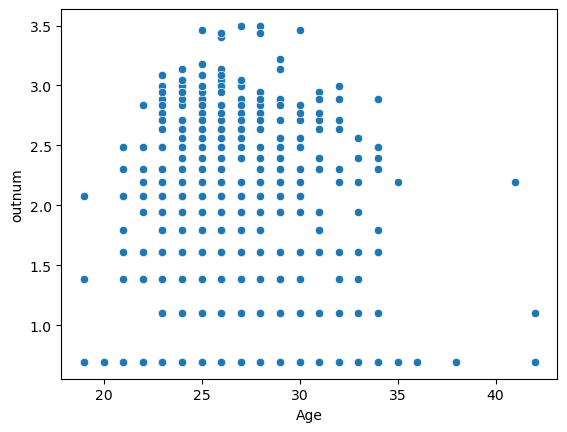

In [13]:
sns.scatterplot(data=df, x='Age', y='outnum')

<Axes: xlabel='occnum', ylabel='outnum'>

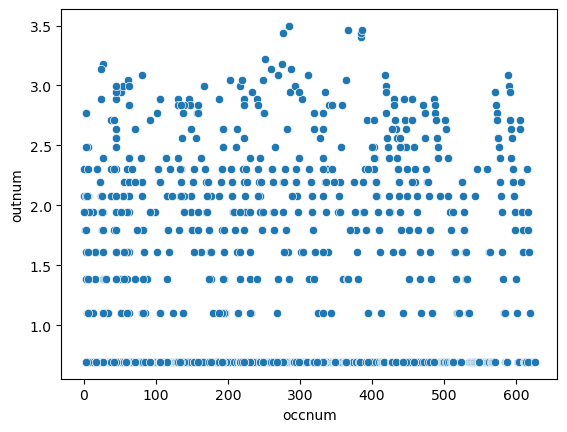

In [14]:
sns.scatterplot(data=df, x='occnum', y='outnum')

In [15]:
#sns.scatterplot(data=df, x='statnum', y='outnum')

In [16]:
import statistics
import random
from tqdm import tqdm
df=df.dropna()


am=statistics.mean(df['Age'])
ast=statistics.stdev(df['Age'])
om=statistics.mean(df['occnum'])
ost=statistics.stdev(df['occnum'])


ts=.1
trs=(1-ts)
trdf=df.sample(frac=1-ts,random_state=2442)
tst=df.drop(trdf.index)
trdf.head()
time.sleep(1)
trdf=trdf.dropna()
b=0
trdf['Age_scaled']=trdf['Age'].apply(lambda x:(x-am)/ast)
trdf['occnum_scaled']= trdf['occnum'].apply(lambda x: (x - om) / ost)
m1 = 0.0
m2 = 0.0
b = 0.0
epochtest={'Epoch':[], 'B':[], 'M1':[], 'M2':[], 'resid':[]}

for i in tqdm(range(len(trdf)), desc="training", unit="iteration"):    
    for j, player in trdf.iterrows(): 
        lr = 0.001/(10^j)

        ypred = b + (m1 * player['Age_scaled']) + (m2 * player['occnum_scaled'])
        yact = player['outnum']
        resid = yact - ypred

        b += lr * resid
        m1 += lr * resid * player['Age_scaled']  
        m2 += lr * resid * player['occnum_scaled']
    epochtest['B'].append(b)
    epochtest['Epoch'].append(i)
    epochtest['M1'].append(m1)
    epochtest['M2'].append(m2)
    epochtest['resid'].append(resid)
epochtest=pd.DataFrame(epochtest)

"""
print(f'M1: {m1} \nM2:{m2} \nB: {b}')
print('\nyact:', yact)
print('ypred:', ypred)
print('resid:', resid)
print(f'\nEquation: y_pred = {b} + {m1}(age) + {m2}(occupation number)')
"""
epochtest.head()

training: 100%|██████████| 899/899 [02:29<00:00,  6.01iteration/s]


,Epoch,B,M1,M2,resid
0,0,0.008121,-0.000054,-0.007330,0.677346
1,1,0.016140,-0.000112,-0.014541,0.661747
2,2,0.024057,-0.000174,-0.021633,0.646371
3,3,0.031876,-0.000239,-0.028610,0.631215
4,4,0.039596,-0.000307,-0.035471,0.616276


In [17]:
best=epochtest[epochtest['resid'].abs() == epochtest['resid'].abs().min()]
b=best['B'].values[0]
m1=best['M1'].values[0]
m2=best['M2'].values[0]
resid=best['resid'].values[0]
print(f'M1: {m1} \nM2:{m2} \nB: {b}')

print('resid:', resid)
print(f'\nEquation: y_pred = {b} + {m1}(age) + {m2}(occupation number)')


M1: -0.009029251705380513 
M2:-0.2961988304917894 
B: 0.3779502228730762
resid: 0.0007188303725441658

Equation: y_pred = 0.3779502228730762 + -0.009029251705380513(age) + -0.2961988304917894(occupation number)


In [18]:


trdf.info()
print('\n')
trdf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 247 to 73
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           899 non-null    object 
 1   Age            899 non-null    float64
 2   Home town      899 non-null    object 
 3   Occupation     899 non-null    object 
 4   Outcome        899 non-null    object 
 5   Season         899 non-null    int64  
 6   occnum         899 non-null    int64  
 7   outnum         899 non-null    float64
 8   Age_scaled     899 non-null    float64
 9   occnum_scaled  899 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 77.3+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum,Age_scaled,occnum_scaled
247,Britnee Marks,25.0,"Holland, Pennsylvania",Paralegal,week 1,15,38,0.693147,-0.468977,-1.155559
508,Eunice Cho,23.0,"Chicago, Illinois",Flight Attendant,n/a,24,26,0.693147,-1.100815,-1.220444
589,Greer Blitzer,24.0,"Bellaire, Texas",Medical Sales Representative,7,27,139,2.079442,-0.784896,-0.609442
90,Carissa Ilburg,25.0,"Cattaraugus, New York",Attorney,n/a,9,5,0.693147,-0.468977,-1.333993
219,Channy Choch,29.0,"Santa Rosa, California",Mortgage Loan Officer,n/a,14,160,0.693147,0.794699,-0.495894


In [19]:


tst.info()
print('\n')
tst.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        100 non-null    object 
 1   Age         100 non-null    float64
 2   Home town   100 non-null    object 
 3   Occupation  100 non-null    object 
 4   Outcome     100 non-null    object 
 5   Season      100 non-null    int64  
 6   occnum      100 non-null    int64  
 7   outnum      100 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.0+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294
10,Angela Lowery,25.0,"Avondale, Arizona",Hooters Waitress,week 2,1,10,1.098612
22,Paula Oliveira,24.0,"Swansea, Massachusetts",Insurance Representative,week 1,1,19,0.693147


In [20]:
import math
result = math.exp(1.791759)
print(result)

5.999997184632331


In [21]:
"""
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
xa = df[['Age', 'occnum']]
ya=df['outnum']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)


model = LinearRegression()

model.fit(Xa_train, ya_train)
print("slope:", model.coef_[0])
ya_pred = model.predict(Xa_test)

mse = mean_squared_error(ya_test, ya_pred)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Predictions:", ya_pred)
r2 = r2_score(ya_test, ya_pred)
print(f'R-squared: {r2}')
"""

'\nimport numpy as np\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score, mean_squared_error\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nxa = df[[\'Age\', \'occnum\']]\nya=df[\'outnum\']\n\nXa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)\n\n\nmodel = LinearRegression()\n\nmodel.fit(Xa_train, ya_train)\nprint("slope:", model.coef_[0])\nya_pred = model.predict(Xa_test)\n\nmse = mean_squared_error(ya_test, ya_pred)\n\nprint("Model coefficients:", model.coef_)\nprint("Model intercept:", model.intercept_)\nprint("Mean Squared Error:", mse)\nprint("Predictions:", ya_pred)\nr2 = r2_score(ya_test, ya_pred)\nprint(f\'R-squared: {r2}\')\n'

### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [22]:
print(b, m1, m2)

0.3779502228730762 -0.009029251705380513 -0.2961988304917894


In [23]:
def equation(age, occ, b=b, m1=m1, m2=m2):
    age = float(age)
    occ = float(occ)
    ypred=b+(m1*age)+(m2*occ)
    return ypred

In [24]:

ssc = {f'season{i}': {'person': [], 'actual': [], 'predicted':[]} for i in df['Season'].unique()}
for i, player in tst.iterrows(): 
    yact = player['outnum']
    person=player['Name']
    season = player['Season']
    age=player['Age']
    occ=player['occnum']
    sid=f'season{season}'
    ssc[sid]['person'].append(person)
    ssc[sid]['actual'].append(yact)
    ssc[sid]['predicted'].append(equation(age=age, occ=occ))
dfss = {}
for season in ssc:
    data = ssc[season]
    df = pd.DataFrame(data)
    if len(df) > 0: 
        dfss[season] = df
acc=0
tot=0
for season, dfs in dfss.items():
    
    winner=dfs[dfs['actual'] == dfs['actual'].max()]
    predwin=dfs[dfs['predicted'] == dfs['predicted'].max()]
    if predwin['person'].iloc[0] == winner['person'].iloc[0]:
        acc+=1
        print("ACCURATE!")
    tot+=1
rests=acc/tot
print('\naccuracy percentage:',rests*100)

ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!
ACCURATE!

accuracy percentage: 67.56756756756756


# Calculations for likely winner:

In [25]:
current = {'Name':[], 
           'Age': [],
           'Home town':[],
           'Occupation': [],
           }
pain=[]
doublepain=[]
for i in range(1):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_29'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    
                    if name == 'N/A':
                        continue
                    else:
                        current['Name'].append(name)
                        current['Age'].append(age)
                        current['Home town'].append(hometown)
                        current['Occupation'].append(occupation)
                        
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
current = pd.DataFrame(current)
current.info()
print("pains:", pain)
current.head()
current['occnum'] = None
Nocc = []
Nn = []

pastlength=len(occupationnumber)
for i, occupation in enumerate(current['Occupation'].unique()):
    if occupation not in occupationnumber['occupation'].values:
        Nocc.append(occupation)
        Nn.append(pastlength + i)
if Nocc:
    nr = pd.DataFrame({
        'occupation': Nocc,
        'number': Nn
    })
    occupationnumber = pd.concat([occupationnumber, nr], ignore_index=True)
for i, player in current.iterrows():
    occupation = player['Occupation']
    assignment = occupationnumber[occupationnumber['occupation'] == occupation]
    current.loc[i, 'occnum']=assignment['number'].values[0]
current['occnum']=pd.to_numeric(current['occnum'], errors='coerce')
print(f'\nInfo')
current.info()
print(f'\nHead')
current.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        25 non-null     object
 1   Age         25 non-null     object
 2   Home town   25 non-null     object
 3   Occupation  25 non-null     object
dtypes: object(4)
memory usage: 932.0+ bytes
pains: []

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        25 non-null     object
 1   Age         25 non-null     object
 2   Home town   25 non-null     object
 3   Occupation  25 non-null     object
 4   occnum      25 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ KB

Head


,Name,Age,Home town,Occupation,occnum
0,Alexe Godin,27,"Néguac, New Brunswick",Pediatric Speech Therapist,627
1,Alli Jo Hinkes,30,"Freehold, New Jersey",Boxing Trainer,628
2,Allyshia Gupta,29,"Wesley Chapel, Florida",Interior Designer,37
3,Bailey Brown,27,"Atlanta, Georgia",Social Media Manager,298
4,Beverly Ortega,30,"Howard Beach, New York",Insurance Salesperson,631


In [26]:
preds = {'person': [], 'predicted': []}
for i, player in current.iterrows(): 
    person=player['Name']
    age=player['Age']
    occ=player['occnum']
    preds['person'].append(person)
    preds['predicted'].append(equation(age=age, occ=occ))
preds=pd.DataFrame(preds)
preds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   person     25 non-null     object 
 1   predicted  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


In [27]:
winner=preds[preds['predicted'] == preds['predicted'].max()]
print("Predicted winner:",winner['person'].values[0])

Predicted winner: Radhika Gupta


### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

#### State the name of your predicted winner here.

I predict that Radhika Gupta will win.

#### Justify your prediction here.

I used a simulation to determine my model's accuracy. This simulation, in brief, compared the contestants within each season to predict who will win. This model was accurate 67.56756756756756% of the time. Please note that the generated values from the equation are not designed for human interpretation. It has no units and was designed to be purely for comparison purposes.

67.56756756756756% is not a satisfying number. While better than random, it cannot be considered super accurate, however, I could not raise this further. I believe this is likely due to the uncertain and entertainment nature of these shows. As they desire maximising their views, it is unlikely that there is a set science behind this. However, I have tried various methods to increase the accuracy.

First I attempted to just use "age" as a variable. This resulted in a model even less accurate then the age and occupation. I then inspected the graphs of age vs amount of wins as well as occupation vs amount of wins. This resulted in two uniform graphs. This signifies that there are no clear relationships between each variable individually, but when mapped over eachother there are areas where the graphs have some overlap. Thus, it will be best to use both. 

Then I considered using home town location as another variable. I quickly realized the bias this induced, however. I am not using just The Bachelor. I am using various spin-offs from different regions. This includes Britain, Brazillian, New Zealand, etc. There will be little correlation between the locations from the different regions making it not a valid variable. 

The last possiblity I considered was the chance of overfitting. I already had a degree of over fitting protection because I saved each residual (and its respective equation) inside a dictionary. This allowed me to select the most accuracte equation while avoiding over fitting by epoch. However, this does not allow for protections against over fitting by lack of variability. Thus, I altered the train and test split. My hope was to gain more varied data for the training dataset to hopefully get a more accurate model. Consequently, I altered the split from its original 25% testing split to a 10% split. This allowed for a more accurate equation, but I am not willing to change it further due to the amount of data needed for accurate testing. If I took away more data from the testing dataset, can I consider the new accuracy to be accurate?

I believe 67.56756756756756% to be the most accurate this model can be. While I have attempted various changes to get a more accurate mdoel, none bore fruit. However, 67.56756756756756% still satisfies the requirement for this project. While not truly satisfying, I believe this is the limit for a linear regression model.

For future analysis and predictions, I would instead use a neural network. This can allow for a deeper analysis of the more nuances between the possible relationships of the data. Such changes are, however, beyond the scope of this project.
